In [24]:
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#IGNORE WARNING
import warnings
warnings.filterwarnings('ignore')

skincancer = pd.read_table('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/skincancer.txt',sep='\s+')

In [25]:
#data copy
skincancer_Original = skincancer[:]

# EDA and Data Preprocessing()

In [26]:
skincancer.shape #49 rows #5 columnsskincancer.head()

(49, 5)

In [27]:
skincancer.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [5]:
skincancer.info() #No  MIssing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   49 non-null     object 
 1   Lat     49 non-null     float64
 2   Mort    49 non-null     int64  
 3   Ocean   49 non-null     int64  
 4   Long    49 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [6]:
sum(skincancer.duplicated()) #No Duplicated Values

0

In [7]:
skincancer.astype('object').describe().transpose() #Ocean having only 2 uniuq values 

,count,unique,top,freq
State,49,49,Arkansas,1
Lat,49,32,39,5
Mort,49,40,117,3
Ocean,49,2,0,27
Long,49,46,71.5,2


In [8]:
skincancer.describe()

,Lat,Mort,Ocean,Long
count,49.000000,49.000000,49.000000,49.000000
mean,39.532653,152.877551,0.448980,90.936735
std,4.610874,33.428177,0.502545,14.866485
min,28.000000,86.000000,0.000000,69.000000
25%,36.000000,128.000000,0.000000,78.500000
50%,39.500000,147.000000,0.000000,89.500000
75%,43.000000,178.000000,1.000000,100.000000
max,47.500000,229.000000,1.000000,121.000000


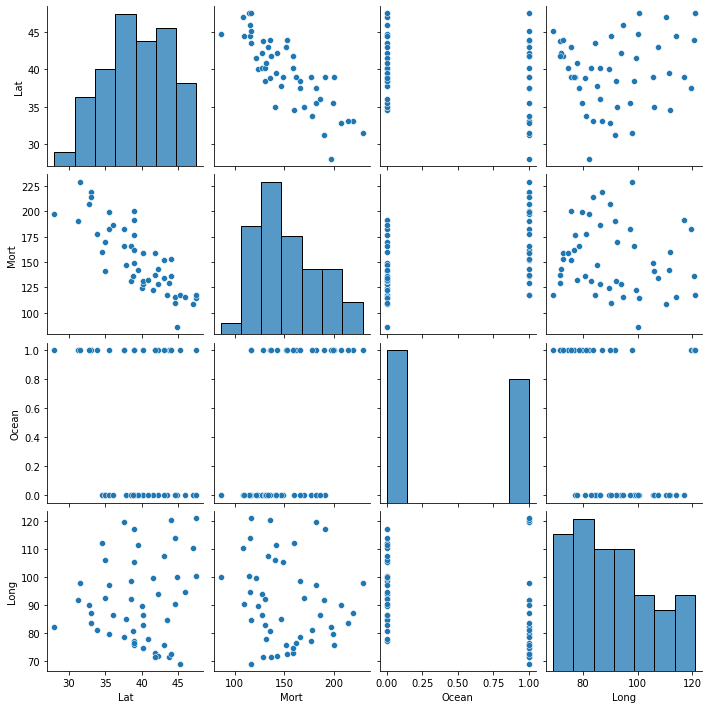

In [9]:
sns.pairplot(skincancer) #TO CHECK THE DESTRIBUTION OF VARIABLES IN THE DATASET

In [11]:
#Which State having highest motality rate
print(skincancer[skincancer.Mort == skincancer.Mort.max()]) #Texas Having the highest Motality Rate

    State   Lat  Mort  Ocean  Long
41  Texas  31.5   229      1  98.0


In [28]:
#TOP 10 states having highest Mortality Rates
MortTop10=skincancer[['State','Mort']].sort_values('Mort',ascending=False).head(10)

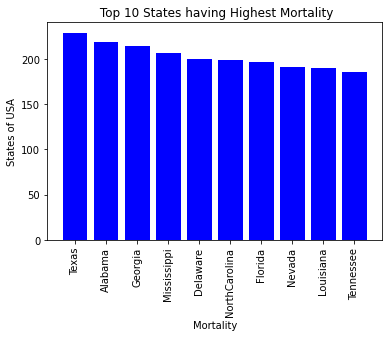

In [13]:
plt.bar("State", "Mort", data = MortTop10, color = "blue")
plt.xlabel("Mortality")
plt.xticks(rotation = 90) #To make States name Visibile not to overlap 
plt.ylabel("States of USA")
plt.title(" Top 10 States having Highest Mortality")
plt.show()

In [29]:
#Checking for correlation between Continouous Variables
skincancer.corr() #We obeserve a Strong Negative Correlation between Mort and Lat ,weak Positive relation between Mort and Ocean

,Lat,Mort,Ocean,Long
Lat,1.000000,-0.824518,-0.219542,0.098974
Mort,-0.824518,1.000000,0.473355,-0.146188
Ocean,-0.219542,0.473355,1.000000,-0.382610
Long,0.098974,-0.146188,-0.382610,1.000000


<AxesSubplot:ylabel='Mort'>

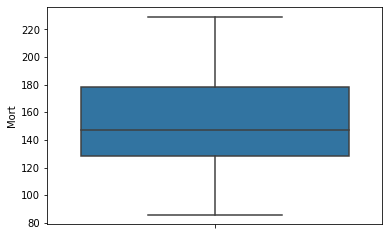

In [14]:
#Checking for any Outliers
sns.boxplot( y=skincancer['Mort'] ) #No outliers

<AxesSubplot:ylabel='Lat'>

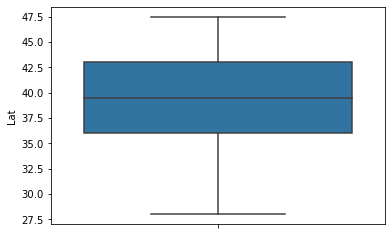

In [17]:
#Checking for any Outliers
sns.boxplot( y=skincancer['Lat'] ) #No outliers

<AxesSubplot:ylabel='Long'>

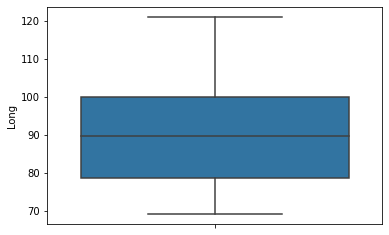

In [30]:
#Checking for any Outliers
sns.boxplot( y=skincancer['Long'] ) #No outliers

In [63]:
len(skincancer[skincancer.Ocean==0])


27

In [64]:
len(skincancer[skincancer.Ocean==1])

22

[Text(0, 0, 'Not Having Cancer'), Text(1, 0, 'Having Cancer')]

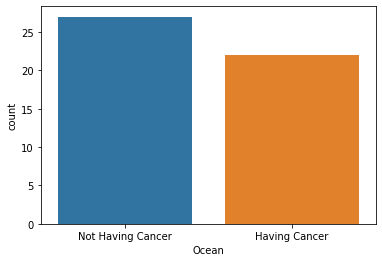

In [4]:
#FreqUENCY barplot of Ocean #Ratio of dataset having cancer(44%) and not having cancer(55%) 
fig, ax = plt.subplots()
bar =sns.countplot(skincancer['Ocean'])
ax.set_xticklabels(["Not Having Cancer","Having Cancer"])

In [5]:
w=skincancer['Ocean'].value_counts()
w

0    27
1    22
Name: Ocean, dtype: int64

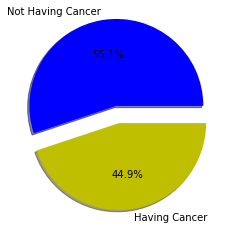

In [112]:
values = [w[0],w[1]]
colors = ['b', 'y']
labels = ['Not Having Cancer','Having Cancer']
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

plt.show()

Ocean
0    138.740741
1    170.227273
Name: Mort, dtype: float64


[Text(0, 0, 'Not Having Cancer'), Text(1, 0, 'Having Cancer')]

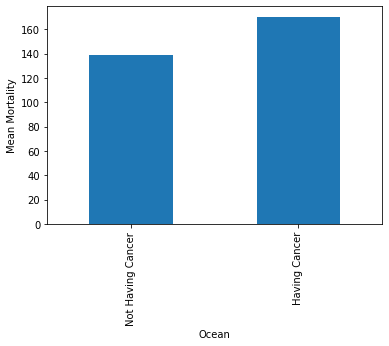

In [10]:
#Mort and Ocean combined with barplot 
fig, ax = plt.subplots()
ax1=skincancer.groupby("Ocean")['Mort'].mean()
print(ax1)
ax1.plot(kind='bar',xlabel="Ocean", # Adding a label on the xaxis
            ylabel="Mean Mortality")
ax.set_xticklabels(["Not Having Cancer","Having Cancer"])
#Higher the Mortality when Having Cancer

<AxesSubplot:xlabel='Ocean', ylabel='Mort'>

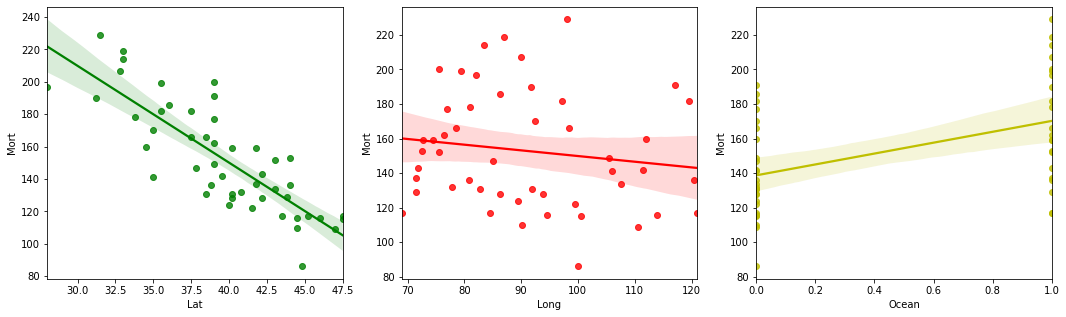

In [15]:
#Plotting the Pearson Correlation
plt.subplots(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=skincancer["Lat"], y=skincancer["Mort"],color="g")
plt.subplot(1, 3, 2)
sns.regplot(x=skincancer["Long"], y=skincancer["Mort"],color="r")
plt.subplot(1, 3, 3)
sns.regplot(x=skincancer["Ocean"], y=skincancer["Mort"],color="y")


## Considering the Response Variable as Mortality 

In [30]:
#Encoding on Ocean Varibale and keep the First column 
df_skincancer = pd.get_dummies(skincancer,columns=['Ocean'],drop_first=True)

In [31]:
df_skincancer.head()

,State,Lat,Mort,Long,Ocean_1
0,Alabama,33.0,219,87.0,1
1,Arizona,34.5,160,112.0,0
2,Arkansas,35.0,170,92.5,0
3,California,37.5,182,119.5,1
4,Colorado,39.0,149,105.5,0


In [32]:
#Dropping the State ,as we have lat and long to figure out State,also state is unique
df_skincancer.drop(['State'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
X = df_skincancer.drop(['Mort','Long'],axis=1) #Removing the Variables which doesnt have strong relation
y= df_skincancer.loc[:,['Mort']]
standardised_X = StandardScaler()
X_standardised = pd.DataFrame(standardised_X.fit_transform(X), columns=X.columns)

In [48]:
import statsmodels.api as sm 
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())
print(X2)

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     76.83
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           2.17e-15
Time:                        11:23:49   Log-Likelihood:                -205.02
No. Observations:                  49   AIC:                             416.0
Df Residuals:                      46   BIC:                             421.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        360.6905     21.498     16.778      0.0

In [20]:
lr.pvalues.idxmax()

'Ocean_1'

In [21]:
lr.pvalues.max()

0.00010863711321421865

In [22]:
lr.pvalues

const      3.115781e-21
Lat        1.026202e-13
Ocean_1    1.086371e-04
dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [36]:
X_train.head()

,Lat,Ocean_1
2,35.0,0
46,38.8,0
18,39.0,1
15,37.8,0
28,40.2,1


In [37]:
y_train.head()

,Mort
2,170
46,136
18,162
15,147
28,159


In [55]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [58]:
model.intercept_ #b0

array([346.49848769])

In [59]:
model.coef_ #b1

array([[-5.27327485, 26.8434471 ]])

In [42]:
#predict y values
y_pred = model.predict(X_test)
y_pred

array([[161.93386802],
       [140.84076863],
       [140.84076863],
       [146.59111634],
       [ 96.01793242],
       [152.91904616],
       [159.2972306 ],
       [156.66059317],
       [140.84076863],
       [111.83775697],
       [135.56749378],
       [186.1406777 ],
       [134.51283881],
       [142.37249646],
       [119.74766924]])

In [52]:
X_test

,Lat,Ocean_1
29,35.0,0
4,39.0,0
26,39.0,0
30,43.0,1
32,47.5,0
37,41.8,1
34,35.5,0
40,36.0,0
7,39.0,0
10,44.5,0


In [45]:
y_pred =pd.DataFrame(y_pred)

In [46]:
y_pred

,0
0,161.933868
1,140.840769
2,140.840769
3,146.591116
4,96.017932
5,152.919046
6,159.297231
7,156.660593
8,140.840769
9,111.837757


In [53]:
#check the mean squared error between the predicted and true values on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,y_pred)) # mae = mean(|y_pred - y_test|) #15 motality rates lower
print(mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]

17.832697393942436
470.548789713214


In [60]:
#r^2 coefficient of determination

model.score(X_train,y_train)   #Training score

0.8535527471717307

In [61]:
model.score(X_test,y_test) 

0.38569228363017916

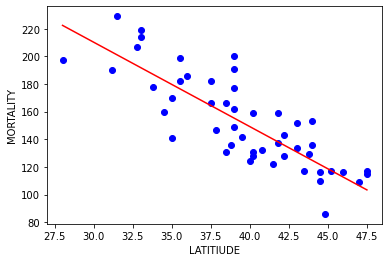

In [91]:
#plot best fit line
h = [[df_skincancer.Lat.min()],[df_skincancer.Lat.max()]]
w = model.predict(h)
plt.plot(h,w,color='red')
plt.scatter(df_skincancer.Lat,df_skincancer.Mort,color='blue')
plt.xlabel('LATITIUDE')
plt.ylabel('MORTALITY')
plt.show()